In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_55/2496845180.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/milan-internet/milan_optimized_data1.csv')


--- 📋 First 5 Rows ---
  square_id  time_interval  country_code   internet
0    GridID   TimeInterval             0   0.000000
1         1  1383260400000            39  11.028366
2         1  1383261000000            33   0.026137
3         1  1383261000000            39  11.100963
4         1  1383261600000            39  10.892771

--- 📊 Statistical Summary ---
      country_code     internet
count  81109778.00  81109778.00
mean        244.72        36.77
std        4041.41       103.49
min           0.00         0.00
25%          39.00         0.09
50%          39.00         3.75
75%          44.00        32.25
max       88239.00      7936.27

--- 🛑 Missing Values ---
square_id        0
time_interval    0
country_code     0
internet         0
dtype: int64

--- 🔢 Data Types ---
square_id         object
time_interval     object
country_code       int64
internet         float64
dtype: object

--- 🏙️ Total Unique Grid Squares: 10,633 ---


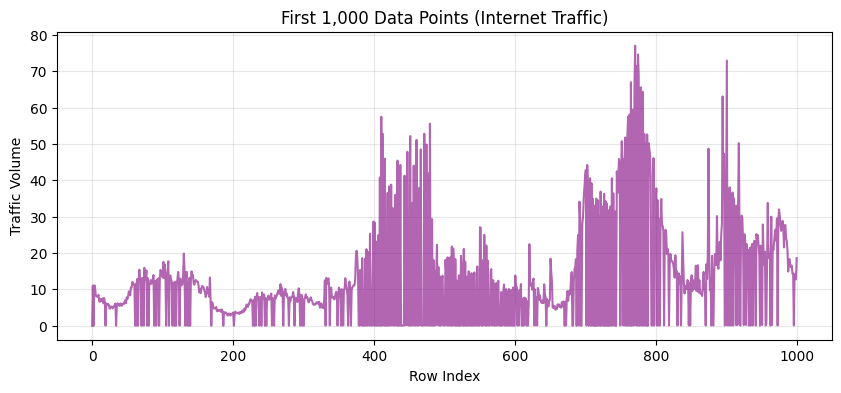

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/milan-internet/milan_optimized_data1.csv')
# 1. VISUAL INSPECTION (What does the raw data look like?)
print("--- 📋 First 5 Rows ---")
print(df.head())

# 2. STATISTICAL SUMMARY (The "Heartbeat" of your data)
# This gives you Count, Mean, Std Dev, Min, 25%, 50%, 75%, Max
print("\n--- 📊 Statistical Summary ---")
print(df.describe().apply(lambda s: s.apply('{0:.2f}'.format))) 

# 3. CHECK FOR MISSING DATA (Are there holes?)
print("\n--- 🛑 Missing Values ---")
print(df.isnull().sum())

# 4. DATA TYPES (Are numbers actually numbers?)
print("\n--- 🔢 Data Types ---")
print(df.dtypes)

# 5. UNIQUE SQUARES (How many squares are we actually looking at?)
print(f"\n--- 🏙️ Total Unique Grid Squares: {df['square_id'].nunique():,} ---")

# 6. QUICK PLOT (Visual check for "Crazy Outliers")
# We plot the first 1000 rows just to see if the internet traffic looks like a line or noise
plt.figure(figsize=(10, 4))
plt.plot(df['internet'].head(1000).values, color='purple', alpha=0.6)
plt.title("First 1,000 Data Points (Internet Traffic)")
plt.xlabel("Row Index")
plt.ylabel("Traffic Volume")
plt.grid(True, alpha=0.3)
plt.show()

--- 📊 GRID DENSITY ANALYSIS ---
Total Unique Grids: 10,633
Average Rows per Grid: 7628.1
Max Rows (Busiest Grid): 38,822
Min Rows (Quietest Grid): 1

--- 🏆 TOP 10 MOST ACTIVE GRIDS (Candidates for City Center) ---
square_id
5161    38822
5160    35580
6064    33227
5362    32833
5461    31814
5061    31654
5460    31551
5162    31386
5361    29636
6808    29497
dtype: int64

--- 📉 BOTTOM 10 LEAST ACTIVE GRIDS (Likely Noise/Errors) ---
square_id
1543      150
1545      150
1447      148
1542      148
15        147
1445      146
1446      146
1549      146
1566       91
GridID      1
dtype: int64


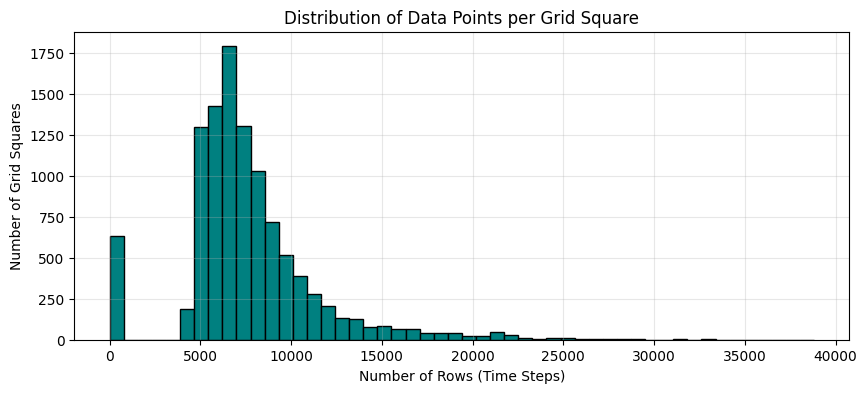

In [5]:
# Group by 'square_id' and count rows
grid_counts = df.groupby('square_id').size().sort_values(ascending=False)

print("--- 📊 GRID DENSITY ANALYSIS ---")
print(f"Total Unique Grids: {len(grid_counts):,}")
print(f"Average Rows per Grid: {grid_counts.mean():.1f}")
print(f"Max Rows (Busiest Grid): {grid_counts.max():,}")
print(f"Min Rows (Quietest Grid): {grid_counts.min():,}")

print("\n--- 🏆 TOP 10 MOST ACTIVE GRIDS (Candidates for City Center) ---")
print(grid_counts.head(10))

print("\n--- 📉 BOTTOM 10 LEAST ACTIVE GRIDS (Likely Noise/Errors) ---")
print(grid_counts.tail(10))

# Visual Check: Histogram of Row Counts
# This tells us: "Do most grids have good data, or is it mostly empty?"
plt.figure(figsize=(10, 4))
plt.hist(grid_counts.values, bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Data Points per Grid Square")
plt.xlabel("Number of Rows (Time Steps)")
plt.ylabel("Number of Grid Squares")
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipykernel_55/2727646712.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/milan-internet/milan_optimized_data2.csv')


--- 📋 First 5 Rows ---
  square_id  time_interval  country_code   internet
0    GridID   TimeInterval             0   0.000000
1         1  1385852400000            39  13.648438
2         1  1385852400000            46   0.026137
3         1  1385853000000            39  13.330858
4         1  1385853600000            39  11.329552

--- 📊 Statistical Summary ---
      country_code     internet
count  79571576.00  79571576.00
mean        300.25        32.30
std        4605.17        85.97
min           0.00         0.00
25%          39.00         0.10
50%          39.00         5.79
75%          43.00        30.85
max       97256.00      6946.21

--- 🛑 Missing Values ---
square_id        0
time_interval    0
country_code     0
internet         0
dtype: int64

--- 🔢 Data Types ---
square_id         object
time_interval     object
country_code       int64
internet         float64
dtype: object

--- 🏙️ Total Unique Grid Squares: 10,641 ---


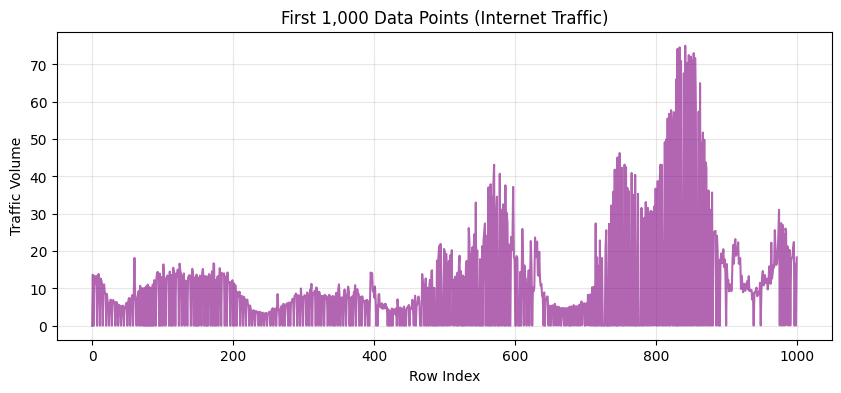

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/milan-internet/milan_optimized_data2.csv')

# 1. VISUAL INSPECTION (What does the raw data look like?)
print("--- 📋 First 5 Rows ---")
print(df.head())

# 2. STATISTICAL SUMMARY (The "Heartbeat" of your data)
# This gives you Count, Mean, Std Dev, Min, 25%, 50%, 75%, Max
print("\n--- 📊 Statistical Summary ---")
print(df.describe().apply(lambda s: s.apply('{0:.2f}'.format))) 

# 3. CHECK FOR MISSING DATA (Are there holes?)
print("\n--- 🛑 Missing Values ---")
print(df.isnull().sum())

# 4. DATA TYPES (Are numbers actually numbers?)
print("\n--- 🔢 Data Types ---")
print(df.dtypes)

# 5. UNIQUE SQUARES (How many squares are we actually looking at?)
print(f"\n--- 🏙️ Total Unique Grid Squares: {df['square_id'].nunique():,} ---")

# 6. QUICK PLOT (Visual check for "Crazy Outliers")
# We plot the first 1000 rows just to see if the internet traffic looks like a line or noise
plt.figure(figsize=(10, 4))
plt.plot(df['internet'].head(1000).values, color='purple', alpha=0.6)
plt.title("First 1,000 Data Points (Internet Traffic)")
plt.xlabel("Row Index")
plt.ylabel("Traffic Volume")
plt.grid(True, alpha=0.3)
plt.show()

--- 📊 GRID DENSITY ANALYSIS ---
Total Unique Grids: 10,641
Average Rows per Grid: 7477.8
Max Rows (Busiest Grid): 34,810
Min Rows (Quietest Grid): 1

--- 🏆 TOP 10 MOST ACTIVE GRIDS (Candidates for City Center) ---
square_id
5161    34810
5160    32625
6064    29727
5162    27285
5061    26727
9491    26447
5159    26408
5060    26332
6165    26257
9590    26134
dtype: int64

--- 📉 BOTTOM 10 LEAST ACTIVE GRIDS (Likely Noise/Errors) ---
square_id
1231      149
1232      149
1224      149
1120      148
1119      148
1220      148
1019      148
1320      148
1575      138
GridID      1
dtype: int64


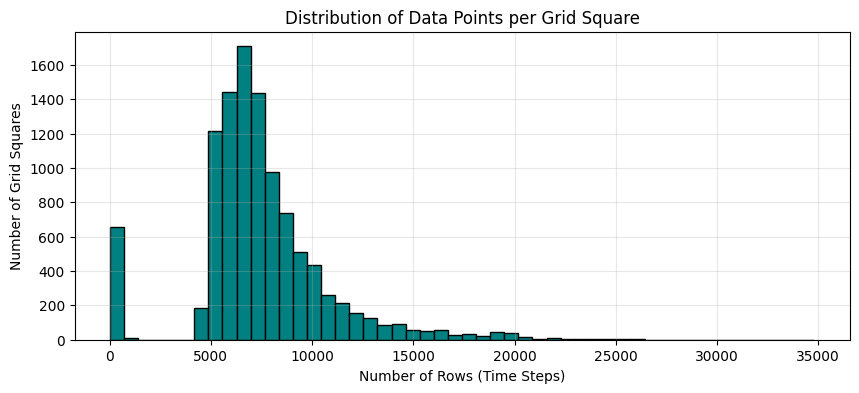

In [7]:
# Group by 'square_id' and count rows
grid_counts = df.groupby('square_id').size().sort_values(ascending=False)

print("--- 📊 GRID DENSITY ANALYSIS ---")
print(f"Total Unique Grids: {len(grid_counts):,}")
print(f"Average Rows per Grid: {grid_counts.mean():.1f}")
print(f"Max Rows (Busiest Grid): {grid_counts.max():,}")
print(f"Min Rows (Quietest Grid): {grid_counts.min():,}")

print("\n--- 🏆 TOP 10 MOST ACTIVE GRIDS (Candidates for City Center) ---")
print(grid_counts.head(10))

print("\n--- 📉 BOTTOM 10 LEAST ACTIVE GRIDS (Likely Noise/Errors) ---")
print(grid_counts.tail(10))

# Visual Check: Histogram of Row Counts
# This tells us: "Do most grids have good data, or is it mostly empty?"
plt.figure(figsize=(10, 4))
plt.hist(grid_counts.values, bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Data Points per Grid Square")
plt.xlabel("Number of Rows (Time Steps)")
plt.ylabel("Number of Grid Squares")
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# ==========================================
# CONFIGURATION
# ==========================================
# Change this path to .../milan_optimized_data2.csv when you run the second file
INPUT_FILE = "/kaggle/input/milan-internet/milan_optimized_data1.csv"
CHUNK_SIZE = 5_000_000 

print(f"--- 🗳️ STARTING THE DAILY ELECTION ---")
print("   Scanning 60 days of traffic...")
print("   Rules: City=DaySum | Home=NightSum (No Subtraction) | Spiky=Max/Median")

# Initialize Vote Trackers
votes_city = Counter()
votes_home = Counter()
votes_spiky = Counter()

# Buffer variables
current_day_data = []
current_date_str = None
processed_days = 0

# Helper Function to Process One Complete Day
def process_day(day_data_list, date_label):
    if not day_data_list: return None, None, None
    
    # 1. Combine chunks for this day
    df_day = pd.concat(day_data_list)
    
    # 2. AGGREGATE (Fix Country Code Split)
    # Sum internet for same Grid + Time
    daily_total = df_day.groupby(['square_id', 'time_interval'])['internet'].sum().reset_index()
    
    # 3. ADD TIME FEATURES
    daily_total['datetime'] = pd.to_datetime(daily_total['time_interval'], unit='ms')
    daily_total['hour'] = daily_total['datetime'].dt.hour
    
    # 4. CALCULATE STATS PER GRID
    # We need Sum(Day), Sum(Night), Max, Median
    
    # Pre-calculate day/night sums to speed up
    day_mask = daily_total['hour'].between(9, 16)   # 9 AM - 5 PM
    night_mask = daily_total['hour'].between(19, 23) # 7 PM - 11 PM
    
    # Group by GridID for basic stats
    stats = daily_total.groupby('square_id')['internet'].agg(['max', 'median', 'mean'])
    
    # Fast calculation of Day/Night Sums
    stats['day_sum'] = daily_total[day_mask].groupby('square_id')['internet'].sum()
    stats['night_sum'] = daily_total[night_mask].groupby('square_id')['internet'].sum()
    stats = stats.fillna(0) 
    
    # 5. APPLY FORMULAS
    
    # A. CITY SCORE: Total Day Volume
    stats['score_city'] = stats['day_sum']
    
    # B. HOME SCORE: Total Night Volume (Pure Sum, as requested)
    stats['score_home'] = stats['night_sum']
    
    # C. SPIKY SCORE: Max / Median (The "Sleeping Giant" Ratio)
    # We add +1 to median to avoid division by zero
    # We also filter out tiny grids (max < 100) to avoid noise
    valid_spiky = stats[stats['max'] > 100].copy()
    valid_spiky['score_spiky'] = valid_spiky['max'] / (valid_spiky['median'] + 1)
    
    # 6. CAST VOTES (Draft Pick System)
    # This prevents the City Center from winning everything
    
    # 1st Pick: City (Highest Day Sum)
    winner_city = stats['score_city'].idxmax()
    votes_city[winner_city] += 1
    
    # 2nd Pick: Home (Highest Night Sum, EXCLUDING the City Winner)
    # We temporarily drop the city winner from the candidates
    candidates_home = stats.drop(index=winner_city, errors='ignore')
    if not candidates_home.empty:
        winner_home = candidates_home['score_home'].idxmax()
        votes_home[winner_home] += 1
    else:
        winner_home = "None"
        
    # 3rd Pick: Spiky (Highest Ratio, EXCLUDING City & Home Winners)
    candidates_spiky = valid_spiky.drop(index=[winner_city, winner_home], errors='ignore')
    if not candidates_spiky.empty:
        winner_spiky = candidates_spiky['score_spiky'].idxmax()
        votes_spiky[winner_spiky] += 1
    else:
        winner_spiky = "None"
        
    return winner_city, winner_home, winner_spiky

# ==========================================
# MAIN LOOP
# ==========================================
# Try/Except to handle header issues safely
try:
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=CHUNK_SIZE)
except:
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=CHUNK_SIZE, header=None, names=['square_id', 'time_interval', 'country_code', 'internet'])

for chunk in chunk_iterator:
    # Clean Garbage
    chunk = chunk[chunk['square_id'] != 'GridID']
    
    # Fix Types
    chunk['square_id'] = chunk['square_id'].astype(str)
    chunk['time_interval'] = pd.to_numeric(chunk['time_interval'])
    chunk['internet'] = pd.to_numeric(chunk['internet'])
    
    # Get Date
    chunk['date'] = pd.to_datetime(chunk['time_interval'], unit='ms').dt.date.astype(str)
    
    unique_dates = chunk['date'].unique()
    
    for date in unique_dates:
        # If date changes, process the buffer (The previous day)
        if current_date_str is not None and date != current_date_str:
            c_win, h_win, s_win = process_day(current_day_data, current_date_str)
            processed_days += 1
            print(f"   🗓️  Day {processed_days} ({current_date_str}) -> City: {c_win} | Home: {h_win} | Spiky: {s_win}", end='\r')
            current_day_data = [] # Reset Buffer
            
        current_date_str = date
        current_day_data.append(chunk[chunk['date'] == date])

# Process the very last day remaining in buffer
if current_day_data:
    process_day(current_day_data, current_date_str)
    print(f"   🗓️  Day {processed_days+1} ({current_date_str}) -> Processed.")

# ==========================================
# FINAL RESULTS
# ==========================================
print("\n\n🎉 ELECTION COMPLETE!")

print("\n🏙️  POD 0 (CITY CENTER - Office)")
top_city = votes_city.most_common(3)
for sq, count in top_city:
    print(f"   - Grid {sq}: Won {count} days")

print("\n🏠 POD 1 (RESIDENTIAL - Home)")
top_home = votes_home.most_common(3)
for sq, count in top_home:
    print(f"   - Grid {sq}: Won {count} days")

print("\n⚡ POD 2 (SPIKY - Events)")
top_spiky = votes_spiky.most_common(3)
for sq, count in top_spiky:
    print(f"   - Grid {sq}: Won {count} days")

# Save the Winners to variables
if top_city: city_id = top_city[0][0]
if top_home: home_id = top_home[0][0]
if top_spiky: spiky_id = top_spiky[0][0]

print(f"\n✅ FINAL SELECTION: City={city_id}, Home={home_id}, Spiky={spiky_id}")

--- 🗳️ STARTING THE DAILY ELECTION ---
   Scanning 60 days of traffic...
   Rules: City=DaySum | Home=NightSum (No Subtraction) | Spiky=Max/Median
   🗓️  Day 48 (2013-11-29) -> Processed. | Home: 4857 | Spiky: 8983


🎉 ELECTION COMPLETE!

🏙️  POD 0 (CITY CENTER - Office)
   - Grid 5259: Won 17 days
   - Grid 5161: Won 9 days
   - Grid 4459: Won 3 days

🏠 POD 1 (RESIDENTIAL - Home)
   - Grid 5758: Won 14 days
   - Grid 4857: Won 10 days
   - Grid 5857: Won 4 days

⚡ POD 2 (SPIKY - Events)
   - Grid 7824: Won 3 days
   - Grid 7721: Won 3 days
   - Grid 7821: Won 2 days

✅ FINAL SELECTION: City=5259, Home=5758, Spiky=7824


--- 📊 EXTRACTING DATA FOR PLOTTING ---


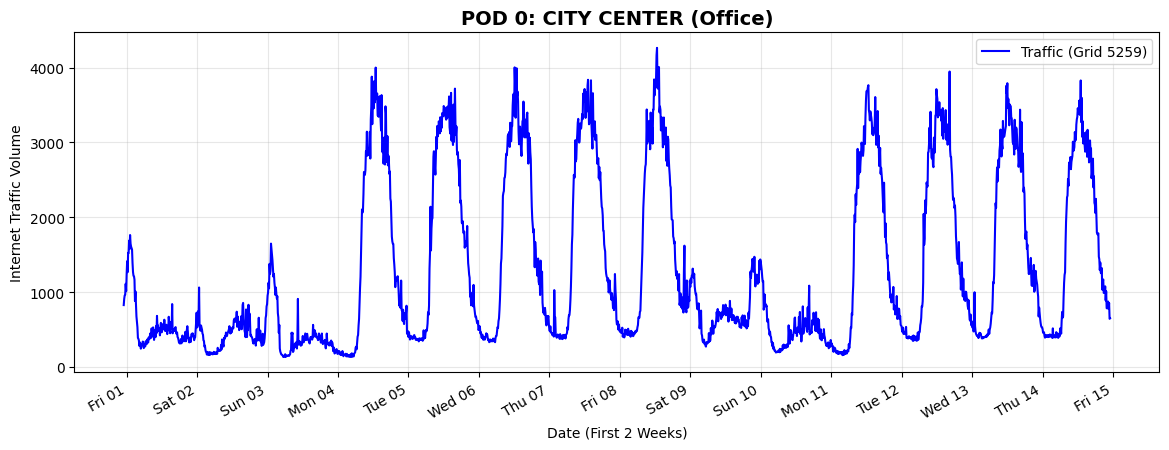

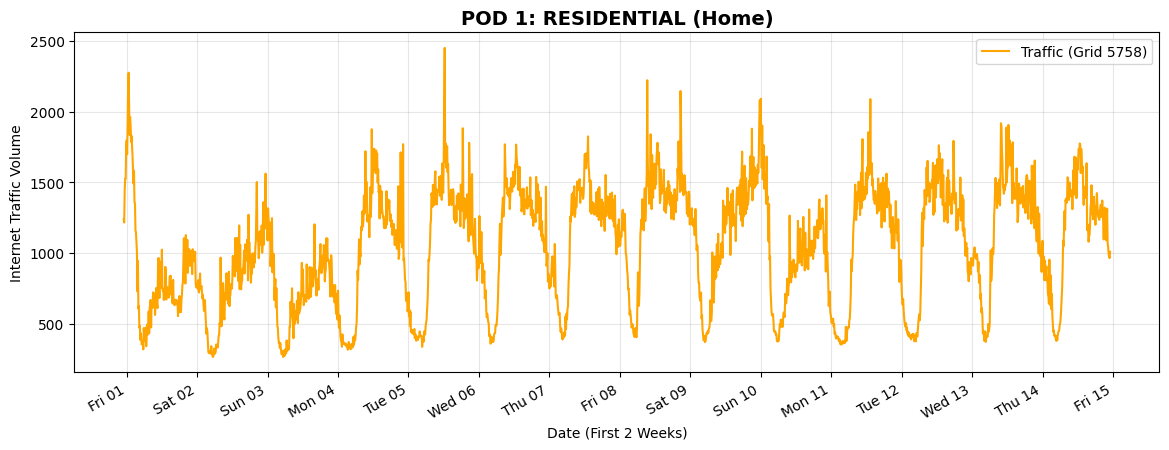

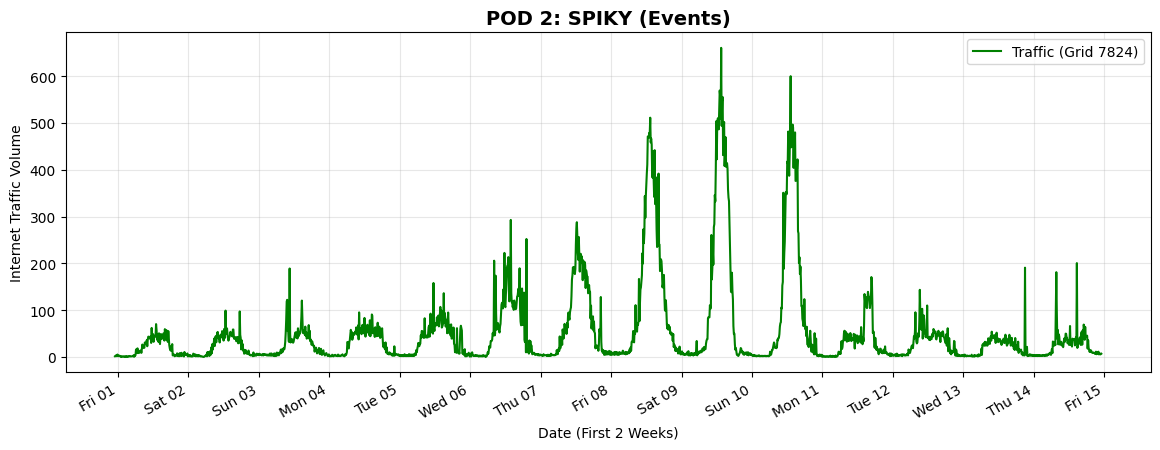

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==========================================
# CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/input/milan-internet/milan_optimized_data1.csv"
# The 3 Winners from your Election
TARGET_GRIDS = ['5259', '5758', '7824'] 
GRID_LABELS = {
    '5259': 'POD 0: CITY CENTER (Office)',
    '5758': 'POD 1: RESIDENTIAL (Home)',
    '7824': 'POD 2: SPIKY (Events)'
}
COLORS = {'5259': 'blue', '5758': 'orange', '7824': 'green'}

print(f"--- 📊 EXTRACTING DATA FOR PLOTTING ---")

# 1. EXTRACT DATA (Chunk by Chunk to save RAM)
extracted_data = []
chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=5_000_000)

for chunk in chunk_iterator:
    # Clean Garbage
    chunk = chunk[chunk['square_id'] != 'GridID']
    
    # Ensure ID is string
    chunk['square_id'] = chunk['square_id'].astype(str)
    
    # Filter for our 3 targets
    mask = chunk['square_id'].isin(TARGET_GRIDS)
    if mask.any():
        extracted_data.append(chunk[mask])

# Combine into one DataFrame
df_plot = pd.concat(extracted_data)

# 2. PREPARE DATA
df_plot['internet'] = pd.to_numeric(df_plot['internet'])
df_plot['time_interval'] = pd.to_numeric(df_plot['time_interval'])

# Aggregate (Summing Country Codes)
# We want TOTAL traffic per grid per timestamp
df_agg = df_plot.groupby(['square_id', 'time_interval'])['internet'].sum().reset_index()

# Add Datetime
df_agg['datetime'] = pd.to_datetime(df_agg['time_interval'], unit='ms')
df_agg = df_agg.sort_values('datetime')

# 3. PLOT EACH POD SEPARATELY (First 2 Weeks)
# We limit to 14 days so the daily pattern is visible (60 days is too squished)
start_date = df_agg['datetime'].min()
end_date = start_date + pd.Timedelta(days=14)
df_subset = df_agg[df_agg['datetime'] <= end_date]

for grid_id in TARGET_GRIDS:
    subset = df_subset[df_subset['square_id'] == grid_id]
    
    plt.figure(figsize=(14, 5))
    plt.plot(subset['datetime'], subset['internet'], 
             label=f"Traffic (Grid {grid_id})", 
             color=COLORS[grid_id], 
             linewidth=1.5)
    
    # Styling
    plt.title(GRID_LABELS[grid_id], fontsize=14, fontweight='bold')
    plt.ylabel("Internet Traffic Volume")
    plt.xlabel("Date (First 2 Weeks)")
    plt.grid(True, alpha=0.3)
    
    # Format X-axis to show Days clearly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d')) # "Mon 01"
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()
    
    plt.legend()
    plt.show()

In [9]:
import pandas as pd
import numpy as np
from collections import Counter
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# ==========================================
# CONFIGURATION
# ==========================================
# Change this path to .../milan_optimized_data2.csv when you run the second file
INPUT_FILE = "/kaggle/input/milan-internet/milan_optimized_data2.csv"
CHUNK_SIZE = 5_000_000 

print(f"--- 🗳️ STARTING THE DAILY ELECTION ---")
print("   Scanning 60 days of traffic...")
print("   Rules: City=DaySum | Home=NightSum (No Subtraction) | Spiky=Max/Median")

# Initialize Vote Trackers
votes_city = Counter()
votes_home = Counter()
votes_spiky = Counter()

# Buffer variables
current_day_data = []
current_date_str = None
processed_days = 0

# Helper Function to Process One Complete Day
def process_day(day_data_list, date_label):
    if not day_data_list: return None, None, None
    
    # 1. Combine chunks for this day
    df_day = pd.concat(day_data_list)
    
    # 2. AGGREGATE (Fix Country Code Split)
    # Sum internet for same Grid + Time
    daily_total = df_day.groupby(['square_id', 'time_interval'])['internet'].sum().reset_index()
    
    # 3. ADD TIME FEATURES
    daily_total['datetime'] = pd.to_datetime(daily_total['time_interval'], unit='ms')
    daily_total['hour'] = daily_total['datetime'].dt.hour
    
    # 4. CALCULATE STATS PER GRID
    # We need Sum(Day), Sum(Night), Max, Median
    
    # Pre-calculate day/night sums to speed up
    day_mask = daily_total['hour'].between(9, 16)   # 9 AM - 5 PM
    night_mask = daily_total['hour'].between(19, 23) # 7 PM - 11 PM
    
    # Group by GridID for basic stats
    stats = daily_total.groupby('square_id')['internet'].agg(['max', 'median', 'mean'])
    
    # Fast calculation of Day/Night Sums
    stats['day_sum'] = daily_total[day_mask].groupby('square_id')['internet'].sum()
    stats['night_sum'] = daily_total[night_mask].groupby('square_id')['internet'].sum()
    stats = stats.fillna(0) 
    
    # 5. APPLY FORMULAS
    
    # A. CITY SCORE: Total Day Volume
    stats['score_city'] = stats['day_sum']
    
    # B. HOME SCORE: Total Night Volume (Pure Sum, as requested)
    stats['score_home'] = stats['night_sum']
    
    # C. SPIKY SCORE: Max / Median (The "Sleeping Giant" Ratio)
    # We add +1 to median to avoid division by zero
    # We also filter out tiny grids (max < 100) to avoid noise
    valid_spiky = stats[stats['max'] > 100].copy()
    valid_spiky['score_spiky'] = valid_spiky['max'] / (valid_spiky['median'] + 1)
    
    # 6. CAST VOTES (Draft Pick System)
    # This prevents the City Center from winning everything
    
    # 1st Pick: City (Highest Day Sum)
    winner_city = stats['score_city'].idxmax()
    votes_city[winner_city] += 1
    
    # 2nd Pick: Home (Highest Night Sum, EXCLUDING the City Winner)
    # We temporarily drop the city winner from the candidates
    candidates_home = stats.drop(index=winner_city, errors='ignore')
    if not candidates_home.empty:
        winner_home = candidates_home['score_home'].idxmax()
        votes_home[winner_home] += 1
    else:
        winner_home = "None"
        
    # 3rd Pick: Spiky (Highest Ratio, EXCLUDING City & Home Winners)
    candidates_spiky = valid_spiky.drop(index=[winner_city, winner_home], errors='ignore')
    if not candidates_spiky.empty:
        winner_spiky = candidates_spiky['score_spiky'].idxmax()
        votes_spiky[winner_spiky] += 1
    else:
        winner_spiky = "None"
        
    return winner_city, winner_home, winner_spiky

# ==========================================
# MAIN LOOP
# ==========================================
# Try/Except to handle header issues safely
try:
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=CHUNK_SIZE)
except:
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=CHUNK_SIZE, header=None, names=['square_id', 'time_interval', 'country_code', 'internet'])

for chunk in chunk_iterator:
    # Clean Garbage
    chunk = chunk[chunk['square_id'] != 'GridID']
    
    # Fix Types
    chunk['square_id'] = chunk['square_id'].astype(str)
    chunk['time_interval'] = pd.to_numeric(chunk['time_interval'])
    chunk['internet'] = pd.to_numeric(chunk['internet'])
    
    # Get Date
    chunk['date'] = pd.to_datetime(chunk['time_interval'], unit='ms').dt.date.astype(str)
    
    unique_dates = chunk['date'].unique()
    
    for date in unique_dates:
        # If date changes, process the buffer (The previous day)
        if current_date_str is not None and date != current_date_str:
            c_win, h_win, s_win = process_day(current_day_data, current_date_str)
            processed_days += 1
            print(f"   🗓️  Day {processed_days} ({current_date_str}) -> City: {c_win} | Home: {h_win} | Spiky: {s_win}", end='\r')
            current_day_data = [] # Reset Buffer
            
        current_date_str = date
        current_day_data.append(chunk[chunk['date'] == date])

# Process the very last day remaining in buffer
if current_day_data:
    process_day(current_day_data, current_date_str)
    print(f"   🗓️  Day {processed_days+1} ({current_date_str}) -> Processed.")

# ==========================================
# FINAL RESULTS
# ==========================================
print("\n\n🎉 ELECTION COMPLETE!")

print("\n🏙️  POD 0 (CITY CENTER - Office)")
top_city = votes_city.most_common(3)
for sq, count in top_city:
    print(f"   - Grid {sq}: Won {count} days")

print("\n🏠 POD 1 (RESIDENTIAL - Home)")
top_home = votes_home.most_common(3)
for sq, count in top_home:
    print(f"   - Grid {sq}: Won {count} days")

print("\n⚡ POD 2 (SPIKY - Events)")
top_spiky = votes_spiky.most_common(3)
for sq, count in top_spiky:
    print(f"   - Grid {sq}: Won {count} days")

# Save the Winners to variables
if top_city: city_id = top_city[0][0]
if top_home: home_id = top_home[0][0]
if top_spiky: spiky_id = top_spiky[0][0]

print(f"\n✅ FINAL SELECTION: City={city_id}, Home={home_id}, Spiky={spiky_id}")

--- 🗳️ STARTING THE DAILY ELECTION ---
   Scanning 60 days of traffic...
   Rules: City=DaySum | Home=NightSum (No Subtraction) | Spiky=Max/Median
   🗓️  Day 48 (2014-01-01) -> Processed. | Home: 5059 | Spiky: 7468


🎉 ELECTION COMPLETE!

🏙️  POD 0 (CITY CENTER - Office)
   - Grid 5161: Won 16 days
   - Grid 5259: Won 14 days
   - Grid 1: Won 1 days

🏠 POD 1 (RESIDENTIAL - Home)
   - Grid 5957: Won 15 days
   - Grid 4857: Won 8 days
   - Grid 6260: Won 5 days

⚡ POD 2 (SPIKY - Events)
   - Grid 7468: Won 5 days
   - Grid 2366: Won 4 days
   - Grid 7823: Won 2 days

✅ FINAL SELECTION: City=5161, Home=5957, Spiky=7468


--- 📊 EXTRACTING DATA FOR PLOTTING (DATASET 2) ---
   Targets: ['5161', '7468', '7823']


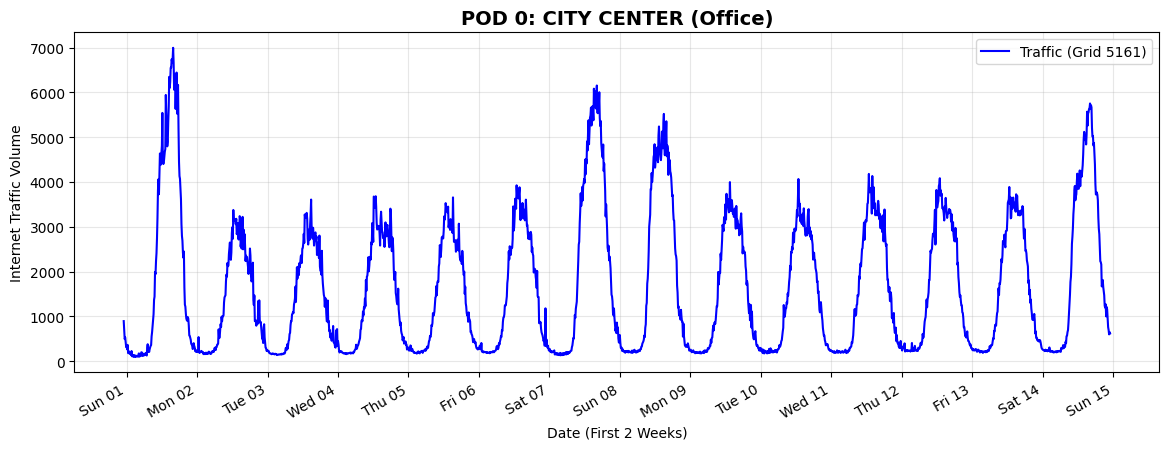

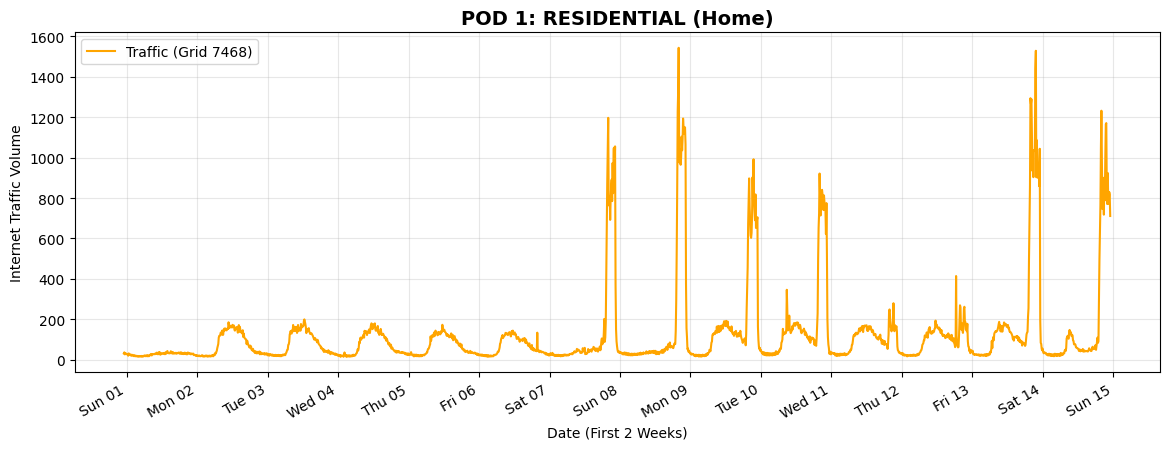

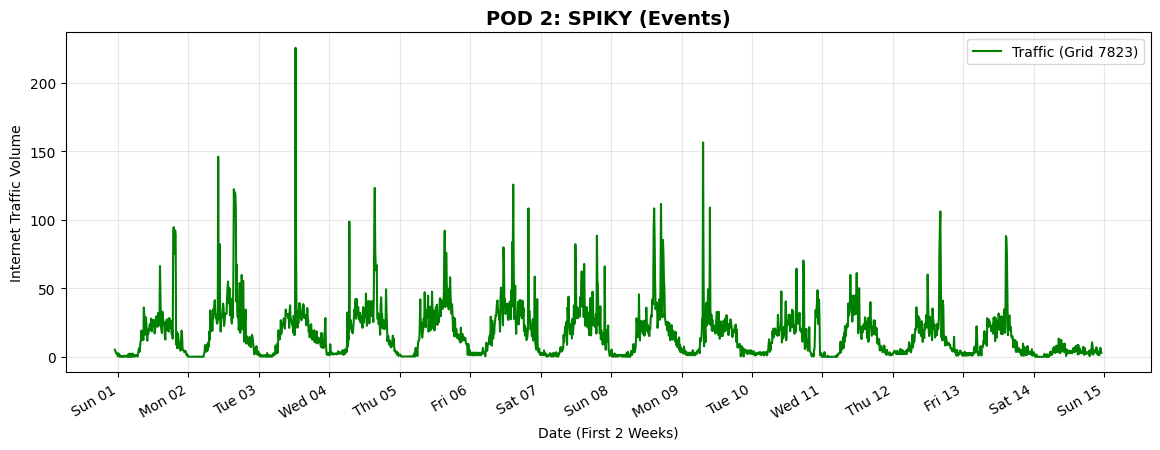

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ==========================================
# CONFIGURATION
# ==========================================
# Make sure this matches where your second file actually is!
INPUT_FILE = "/kaggle/input/milan-internet/milan_optimized_data2.csv" 

# UPDATED WINNERS FROM DATASET 2
# Note: We swapped Spiky to 7823 because 7468 was already used for Home
TARGET_GRIDS = ['5161', '7468', '7823']

GRID_LABELS = {
    '5161': 'POD 0: CITY CENTER (Office)',
    '7468': 'POD 1: RESIDENTIAL (Home)',
    '7823': 'POD 2: SPIKY (Events)'
}

COLORS = {
    '5161': 'blue',   # City
    '7468': 'orange', # Home
    '7823': 'green'   # Spiky
}

print(f"--- 📊 EXTRACTING DATA FOR PLOTTING (DATASET 2) ---")
print(f"   Targets: {TARGET_GRIDS}")

# 1. EXTRACT DATA (Chunk by Chunk to save RAM)
extracted_data = []

# Try/Except block to handle potential header issues or file location errors
try:
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=5_000_000)
except FileNotFoundError:
    print("⚠️ File not found in /kaggle/working/. Trying /kaggle/input/...")
    INPUT_FILE = "/kaggle/input/milan-internet/milan_optimized_data2.csv"
    chunk_iterator = pd.read_csv(INPUT_FILE, chunksize=5_000_000)

for chunk in chunk_iterator:
    # Clean Garbage (Header rows inside data)
    chunk = chunk[chunk['square_id'] != 'GridID']
    
    # Ensure ID is string for matching
    chunk['square_id'] = chunk['square_id'].astype(str)
    
    # Filter for our 3 targets
    mask = chunk['square_id'].isin(TARGET_GRIDS)
    if mask.any():
        extracted_data.append(chunk[mask])

# Combine into one DataFrame
if extracted_data:
    df_plot = pd.concat(extracted_data)
else:
    print("❌ Error: No data found for these Grid IDs. Check your input file.")
    exit()

# 2. PREPARE DATA
df_plot['internet'] = pd.to_numeric(df_plot['internet'])
df_plot['time_interval'] = pd.to_numeric(df_plot['time_interval'])

# Aggregate (Summing Country Codes)
# We want TOTAL traffic per grid per timestamp
df_agg = df_plot.groupby(['square_id', 'time_interval'])['internet'].sum().reset_index()

# Add Datetime
df_agg['datetime'] = pd.to_datetime(df_agg['time_interval'], unit='ms')
df_agg = df_agg.sort_values('datetime')

# 3. PLOT EACH POD SEPARATELY (First 2 Weeks)
# We limit to 14 days so the daily pattern is visible
start_date = df_agg['datetime'].min()
end_date = start_date + pd.Timedelta(days=14)
df_subset = df_agg[df_agg['datetime'] <= end_date]

for grid_id in TARGET_GRIDS:
    subset = df_subset[df_subset['square_id'] == grid_id]
    
    if subset.empty:
        print(f"⚠️ No data found for Grid {grid_id}")
        continue

    plt.figure(figsize=(14, 5))
    plt.plot(subset['datetime'], subset['internet'], 
             label=f"Traffic (Grid {grid_id})", 
             color=COLORS.get(grid_id, 'black'), 
             linewidth=1.5)
    
    # Styling
    plt.title(GRID_LABELS.get(grid_id, f"Grid {grid_id}"), fontsize=14, fontweight='bold')
    plt.ylabel("Internet Traffic Volume")
    plt.xlabel("Date (First 2 Weeks)")
    plt.grid(True, alpha=0.3)
    
    # Format X-axis to show Days clearly
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%a %d')) # "Mon 01"
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
    plt.gcf().autofmt_xdate()
    
    plt.legend()
    plt.show()

In [10]:
import pandas as pd
import numpy as np
import os

# ==========================================
# 1. CONFIGURATION
# ==========================================
FILES = {
    'DS1': "/kaggle/input/milan-internet/milan_optimized_data1.csv",
    'DS2': "/kaggle/input/milan-internet/milan_optimized_data2.csv"
}
CHUNK_SIZE = 5_000_000
OUTPUT_FILE = "/kaggle/working/milan_final_12_RUs.csv"
ZIP_FILE = "/kaggle/working/milan_final_dataset.zip"

# UPDATED TARGETS BASED ON YOUR NEW ELECTION RESULTS
TARGETS = {
    'DS1': {
        'City':  ['5259', '5161'],  # Top 2 City Winners
        'Home':  ['5758', '4857'],  # Top 2 Home Winners
        'Spiky': ['7824', '7721']   # Top 2 Spiky Winners
    },
    'DS2': {
        'City':  ['5161', '5259'],  # Top 2 City Winners
        'Home':  ['5957', '4857'],  # Top 2 Home Winners
        'Spiky': ['7468', '2366']   # Top 2 Spiky Winners
    }
}

final_extraction = []

# ==========================================
# 2. THE EXTRACTION ENGINE
# ==========================================
def process_dataset(name, filepath, targets_dict):
    print(f"\n🚀 PROCESSING {name}...")
    
    # Flatten targets for filtering
    all_ids = [gid for sublist in targets_dict.values() for gid in sublist]
    print(f"   Targets: {all_ids}")
    
    # Storage: { '5259': { '2013-11-01': [rows], ... } }
    grid_data_store = {gid: {} for gid in all_ids}
    
    # A. READ FILE
    try:
        chunk_iterator = pd.read_csv(filepath, chunksize=CHUNK_SIZE)
    except:
        print(f"   ⚠️ Could not read {filepath}. Check path.")
        return

    for i, chunk in enumerate(chunk_iterator):
        # Clean Garbage
        chunk = chunk[chunk['square_id'] != 'GridID']
        chunk['square_id'] = chunk['square_id'].astype(str)
        
        # Filter
        chunk = chunk[chunk['square_id'].isin(all_ids)]
        if chunk.empty: continue
            
        # Fix Types
        chunk['time_interval'] = pd.to_numeric(chunk['time_interval'])
        chunk['internet'] = pd.to_numeric(chunk['internet'])
        
        # Add Date info
        chunk['datetime'] = pd.to_datetime(chunk['time_interval'], unit='ms')
        chunk['date'] = chunk['datetime'].dt.date.astype(str)
        chunk['hour'] = chunk['datetime'].dt.hour
        
        # Store
        for (gid, date_str), group in chunk.groupby(['square_id', 'date']):
            if date_str not in grid_data_store[gid]:
                grid_data_store[gid][date_str] = []
            grid_data_store[gid][date_str].append(group)
            
        print(f"   ✅ Chunk {i+1} scanned...", end='\r')
    
    print(f"\n   📊 Scoring and Selecting Best 4 Days for {name}...")
    
    # B. SCORE & SELECT
    for category, grids in targets_dict.items():
        for gid in grids:
            daily_scores = []
            
            if not grid_data_store[gid]:
                print(f"      ⚠️ No data for Grid {gid}")
                continue
                
            # Process days
            for date_str, fragments in grid_data_store[gid].items():
                full_day = pd.concat(fragments)
                
                # Aggregate (Sum Country Codes)
                full_day_agg = full_day.groupby(['time_interval', 'hour'])['internet'].sum().reset_index()
                
                # Calc Stats
                day_load = full_day_agg[full_day_agg['hour'].between(9, 16)]['internet'].sum()
                night_load = full_day_agg[full_day_agg['hour'].between(19, 23)]['internet'].sum()
                
                max_load = full_day_agg['internet'].max()
                median_load = full_day_agg['internet'].median()
                
                # Apply NEW Formulas
                score = 0
                if category == 'City': 
                    score = day_load
                elif category == 'Home': 
                    score = night_load  # Pure Night Sum (No Subtraction)
                elif category == 'Spiky': 
                    # Max / Median (The Sleeping Giant Ratio)
                    score = max_load / (median_load + 1)
                
                daily_scores.append({'date': date_str, 'score': score, 'data': full_day_agg})
            
            # Sort & Pick Top 4
            daily_scores.sort(key=lambda x: x['score'], reverse=True)
            top_4 = daily_scores[:4]
            
            # Save
            for rank, day_obj in enumerate(top_4):
                df = day_obj['data'].copy()
                df['source_dataset'] = name
                df['square_id'] = gid
                df['pod_type'] = category
                df['rank'] = rank + 1
                df['date'] = day_obj['date']
                
                # Create a unique ID for the final matrix (e.g., DS1_City_5259)
                df['unique_ru_id'] = f"{name}_{category}_{gid}"
                
                final_extraction.append(df)
            
            print(f"      🏆 {category} Grid {gid}: Extracted 4 Best Days")

# ==========================================
# 3. RUN IT
# ==========================================
process_dataset('DS1', FILES['DS1'], TARGETS['DS1'])
process_dataset('DS2', FILES['DS2'], TARGETS['DS2'])

# ==========================================
# 4. SAVE FINAL
# ==========================================
if final_extraction:
    print("\n💾 Combining and Saving...")
    final_df = pd.concat(final_extraction)
    
    # Organize columns
    cols = ['unique_ru_id', 'source_dataset', 'pod_type', 'square_id', 'rank', 'date', 'time_interval', 'internet']
    final_df = final_df[cols]
    
    final_df.to_csv(OUTPUT_FILE, index=False)
    print(f"✅ CSV Saved: {OUTPUT_FILE} ({len(final_df):,} rows)")
    
    # Zip
    os.system(f"zip -j {ZIP_FILE} {OUTPUT_FILE}")
    print(f"📦 ZIP Ready: {ZIP_FILE}")
else:
    print("\n❌ CRITICAL FAILURE: No data extracted.")


🚀 PROCESSING DS1...
   Targets: ['5259', '5161', '5758', '4857', '7824', '7721']
   ✅ Chunk 17 scanned...
   📊 Scoring and Selecting Best 4 Days for DS1...
      🏆 City Grid 5259: Extracted 4 Best Days
      🏆 City Grid 5161: Extracted 4 Best Days
      🏆 Home Grid 5758: Extracted 4 Best Days
      🏆 Home Grid 4857: Extracted 4 Best Days
      🏆 Spiky Grid 7824: Extracted 4 Best Days
      🏆 Spiky Grid 7721: Extracted 4 Best Days

🚀 PROCESSING DS2...
   Targets: ['5161', '5259', '5957', '4857', '7468', '2366']
   ✅ Chunk 16 scanned...
   📊 Scoring and Selecting Best 4 Days for DS2...
      🏆 City Grid 5161: Extracted 4 Best Days
      🏆 City Grid 5259: Extracted 4 Best Days
      🏆 Home Grid 5957: Extracted 4 Best Days
      🏆 Home Grid 4857: Extracted 4 Best Days
      🏆 Spiky Grid 7468: Extracted 4 Best Days
      🏆 Spiky Grid 2366: Extracted 4 Best Days

💾 Combining and Saving...
✅ CSV Saved: /kaggle/working/milan_final_12_RUs.csv (6,906 rows)
updating: milan_final_12_RUs.csv (defl

--- 📊 GENERATING AVERAGE POD PROFILES ---


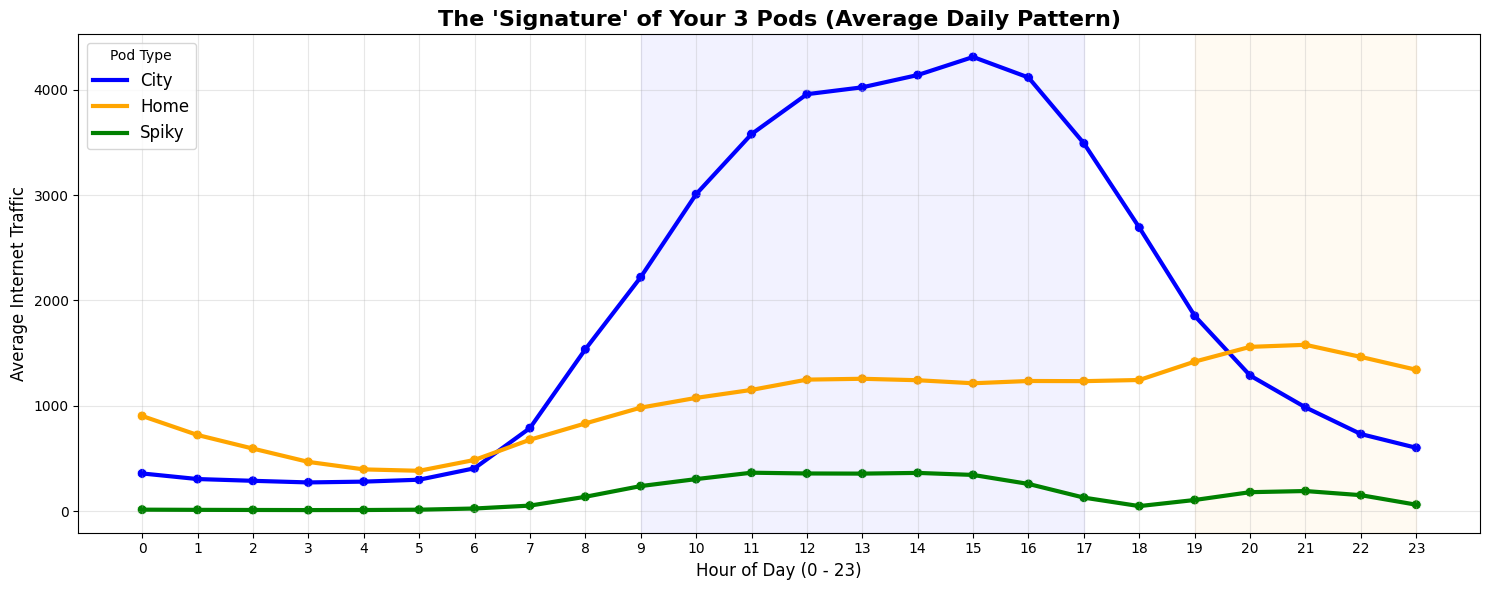

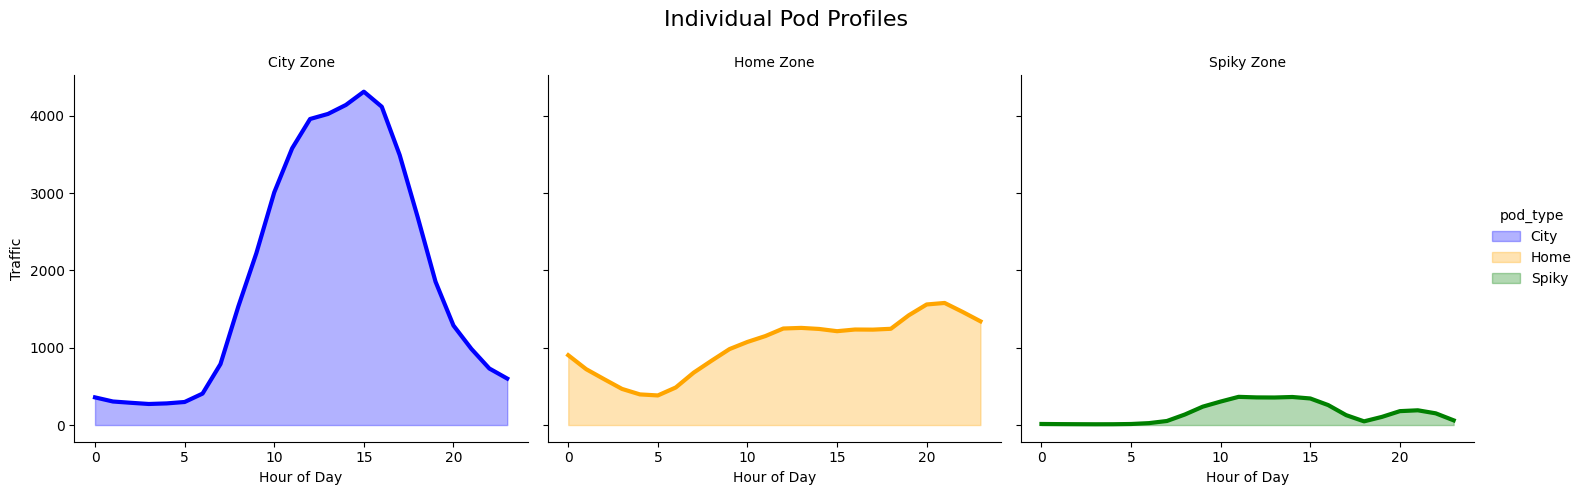

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/milan_final_12_RUs.csv"

print(f"--- 📊 GENERATING AVERAGE POD PROFILES ---")

# 1. LOAD DATA
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ File not found. Make sure you ran the extraction script first!")
    exit()

# 2. PREPARE TIME DATA
# We need to overlay all days on top of each other (00:00 to 23:00)
# So we ignore the "Date" and just look at "Hour"
df['datetime'] = pd.to_datetime(df['time_interval'], unit='ms')
df['hour'] = df['datetime'].dt.hour

# 3. AGGREGATE TO FIND THE "TYPICAL DAY"
# Group by Pod -> Hour -> Mean
# This averages all 4 RUs and all 4 Days together for that specific hour
pod_profiles = df.groupby(['pod_type', 'hour'])['internet'].mean().reset_index()

# ==========================================
# 4. PLOT
# ==========================================
plt.figure(figsize=(15, 6))

# Define Colors
palette = {
    'City': 'blue', 
    'Home': 'orange', 
    'Spiky': 'green'
}

# Plot Lines
sns.lineplot(data=pod_profiles, x='hour', y='internet', hue='pod_type', palette=palette, linewidth=3)

# Add Markers to make points clear
sns.scatterplot(data=pod_profiles, x='hour', y='internet', hue='pod_type', palette=palette, s=50, legend=False)

# Styling
plt.title("The 'Signature' of Your 3 Pods (Average Daily Pattern)", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day (0 - 23)", fontsize=12)
plt.ylabel("Average Internet Traffic", fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.legend(title="Pod Type", fontsize=12)

# Shade the "Work" and "Home" hours for context
plt.axvspan(9, 17, color='blue', alpha=0.05, label='Work Hours')
plt.axvspan(19, 23, color='orange', alpha=0.05, label='Home Hours')

plt.tight_layout()
plt.show()

# ==========================================
# 5. SPLIT PLOTS (If you want them separate)
# ==========================================
g = sns.FacetGrid(pod_profiles, col="pod_type", hue="pod_type", palette=palette, height=5, aspect=1)
g.map(plt.plot, "hour", "internet", linewidth=3)
g.map(plt.fill_between, "hour", "internet", alpha=0.3) # Fill under curve
g.set_axis_labels("Hour of Day", "Traffic")
g.set_titles("{col_name} Zone")
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Individual Pod Profiles', fontsize=16)
plt.show()

🚀 BUILDING FINAL DATASET (12 RUs x 24 Hours)
   ✅ RU_1 [Commercial_Zone]: Grid 5259 (DS1)
   ✅ RU_2 [Commercial_Zone]: Grid 5161 (DS1)
   ✅ RU_3 [Commercial_Zone]: Grid 5161 (DS2)
   ✅ RU_4 [Commercial_Zone]: Grid 5259 (DS2)
   ✅ RU_5 [Residential_Zone]: Grid 5758 (DS1)
   ✅ RU_6 [Residential_Zone]: Grid 4857 (DS1)
   ✅ RU_7 [Residential_Zone]: Grid 5957 (DS2)
   ✅ RU_8 [Residential_Zone]: Grid 4857 (DS2)
   ✅ RU_9 [Event_Zone]: Grid 7824 (DS1)
   ✅ RU_10 [Event_Zone]: Grid 7721 (DS1)
   ✅ RU_11 [Event_Zone]: Grid 7468 (DS2)
   ✅ RU_12 [Event_Zone]: Grid 2366 (DS2)

💾 SAVED: /kaggle/working/final_matrix.csv


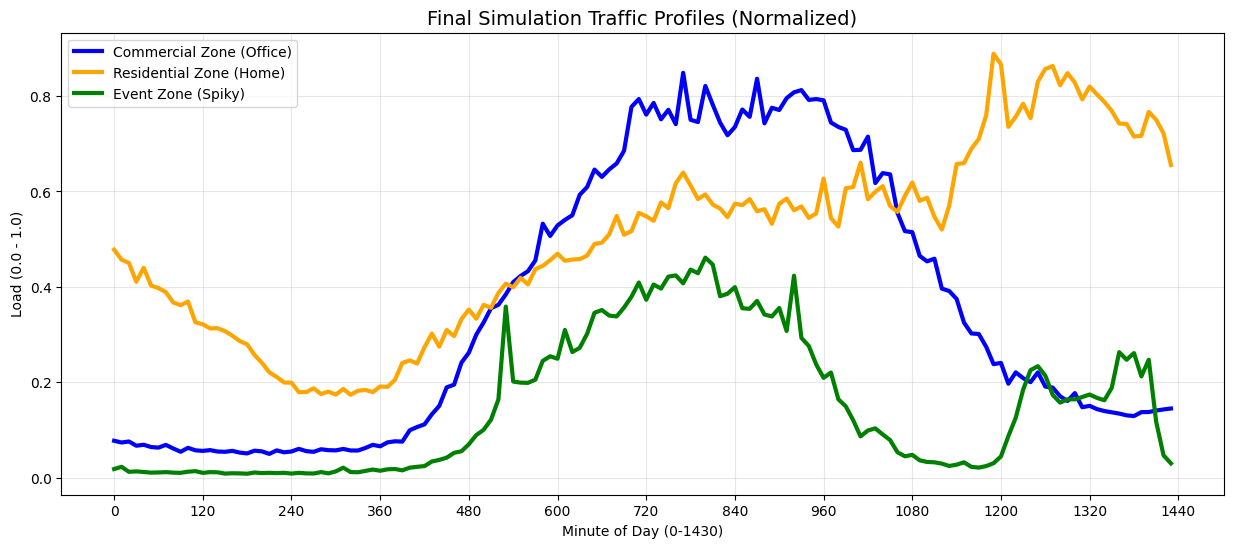

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/milan_final_12_RUs.csv"
OUTPUT_FILE = "/kaggle/working/final_matrix.csv"

# Professional Names for your zones
ZONE_MAP = {
    'City': 'Commercial_Zone',
    'Home': 'Residential_Zone',
    'Spiky': 'Event_Zone'
}

# The Exact Order (0-3=Commercial, 4-7=Residential, 8-11=Event)
ORDER_OF_BATTLE = [
    # --- COMMERCIAL (Day Heavy) ---
    ('DS1', 'City', '5259'), # RU 1
    ('DS1', 'City', '5161'), # RU 2
    ('DS2', 'City', '5161'), # RU 3
    ('DS2', 'City', '5259'), # RU 4
    
    # --- RESIDENTIAL (Night Heavy) ---
    ('DS1', 'Home', '5758'), # RU 5
    ('DS1', 'Home', '4857'), # RU 6
    ('DS2', 'Home', '5957'), # RU 7
    ('DS2', 'Home', '4857'), # RU 8
    
    # --- EVENT (Spiky) ---
    ('DS1', 'Spiky', '7824'), # RU 9
    ('DS1', 'Spiky', '7721'), # RU 10
    ('DS2', 'Spiky', '7468'), # RU 11
    ('DS2', 'Spiky', '2366'), # RU 12
]

print("🚀 BUILDING FINAL DATASET (12 RUs x 24 Hours)")

# ==========================================
# 2. LOAD & PREPARE
# ==========================================
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ Input file not found. Please run the Extraction Script first!")
    exit()

# Create Time Index (0 to 1430 minutes)
df['datetime'] = pd.to_datetime(df['time_interval'], unit='ms')
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute

# Filter for RANK 1 (Best Day only)
df_best = df[df['rank'] == 1].copy()

# ==========================================
# 3. BUILD THE MATRIX
# ==========================================
# Create the skeleton: 00:00 to 23:50 (144 time slots)
time_slots = np.arange(0, 24*60, 10)
final_matrix = pd.DataFrame({'Time_Minute': time_slots})

# We will add a 'Zone_Type' column, but since it varies by RU, 
# we usually keep that in metadata. However, you asked for a column.
# Since the row is "Time", we can't have one single "Type" column for the whole row 
# because RU1 is Commercial and RU5 is Residential. 
# instead, I will save the Types in a separate small CSV or print them for you.
# OR, if you meant you want the dataset Long Form? 
# I will stick to the Wide Form (Time x RUs) as that is standard for simulations.

for i, (ds, pod, grid) in enumerate(ORDER_OF_BATTLE):
    col_name = f"RU_{i+1}"
    
    # 1. Get Data
    subset = df_best[
        (df_best['source_dataset'] == ds) & 
        (df_best['pod_type'] == pod) & 
        (df_best['square_id'] == int(grid))
    ].copy()
    
    if subset.empty:
        print(f"⚠️ Warning: Missing data for {col_name}")
        final_matrix[col_name] = 0.0
        continue

    # 2. Normalize Locally (Fixing the KeyError)
    # We calculate it right here to be safe
    peak_traffic = subset['internet'].max()
    if peak_traffic > 0:
        subset['internet_normalized'] = subset['internet'] / peak_traffic
    else:
        subset['internet_normalized'] = 0.0

    # 3. Reindex to Standard Time
    subset = subset.sort_values('minute_of_day')
    subset = subset.set_index('minute_of_day')
    
    # Reindex to 0, 10, 20... 1430
    reindexed = subset.reindex(time_slots)
    
    # Interpolate missing gaps (linear) and fill NaNs with 0
    clean_series = reindexed['internet_normalized'].interpolate(method='linear').fillna(0)
    
    # 4. Add to Matrix
    final_matrix[col_name] = clean_series.values
    
    # Log
    prof_name = ZONE_MAP[pod]
    print(f"   ✅ {col_name} [{prof_name}]: Grid {grid} ({ds})")

# ==========================================
# 4. SAVE & PLOT
# ==========================================
final_matrix.to_csv(OUTPUT_FILE, index=False)
print(f"\n💾 SAVED: {OUTPUT_FILE}")

# Plot to verify
plt.figure(figsize=(15, 6))

# Commercial (Blue)
plt.plot(final_matrix['Time_Minute'], final_matrix[['RU_1','RU_2','RU_3','RU_4']].mean(axis=1), 
         color='blue', linewidth=3, label='Commercial Zone (Office)')

# Residential (Orange)
plt.plot(final_matrix['Time_Minute'], final_matrix[['RU_5','RU_6','RU_7','RU_8']].mean(axis=1), 
         color='orange', linewidth=3, label='Residential Zone (Home)')

# Event (Green)
plt.plot(final_matrix['Time_Minute'], final_matrix[['RU_9','RU_10','RU_11','RU_12']].mean(axis=1), 
         color='green', linewidth=3, label='Event Zone (Spiky)')

plt.title("Final Simulation Traffic Profiles (Normalized)", fontsize=14)
plt.xlabel("Minute of Day (0-1430)")
plt.ylabel("Load (0.0 - 1.0)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(np.arange(0, 1441, 120))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/milan_final_12_RUs.csv"

# Professional Zone Names
ZONES = ['City', 'Home', 'Spiky']
COLORS = {'City': 'blue', 'Home': 'orange', 'Spiky': 'green'}

print("🚀 BUILDING 4-GRID SEQUENCES (Spatial Diversity)...")

# ==========================================
# 2. LOAD DATA
# ==========================================
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ File not found! Run the extraction script first.")
    exit()

# Time Setup (0 to 1430 minutes)
df['datetime'] = pd.to_datetime(df['time_interval'], unit='ms')
df['minute_of_day'] = df['datetime'].dt.hour * 60 + df['datetime'].dt.minute
time_slots = np.arange(0, 24*60, 10) 

# ==========================================
# 3. BUILD THE SEQUENCES
# ==========================================
sequences = {}

for zone in ZONES:
    full_sequence = []
    
    # Filter for this Zone and Rank 1 (The absolute best day for any grid)
    # We want to find 4 UNIQUE grids that have a "Rank 1" entry
    candidates = df[
        (df['pod_type'] == zone) & 
        (df['rank'] == 1)
    ]
    
    # Get the list of unique grids available in this zone
    # We use 'unique_ru_id' to distinguish DS1_5259 from DS2_5259 if needed
    unique_grids = candidates['unique_ru_id'].unique()
    
    # Select the Top 4 (or fewer if we don't have 4)
    top_4_grids = unique_grids[:4]
    
    print(f"\n   🏆 {zone} Champions selected:")
    
    for i, grid_uid in enumerate(top_4_grids):
        # Get the data for this specific grid's Best Day
        subset = candidates[candidates['unique_ru_id'] == grid_uid].copy()
        
        # 1. Normalize LOCALLY (0 to 1) 
        # Crucial: This makes a small residential grid look just as "full" as a big one
        peak = subset['internet'].max()
        if peak > 0:
            subset['val'] = subset['internet'] / peak
        else:
            subset['val'] = 0
            
        # 2. Reindex to 144 points
        subset = subset.sort_values('minute_of_day').set_index('minute_of_day')
        reindexed = subset.reindex(time_slots)
        clean_day = reindexed['val'].interpolate(method='linear').fillna(0).values
        
        full_sequence.extend(clean_day)
        print(f"      {i+1}. {grid_uid}")

    # If we have fewer than 4 grids, fill the rest with zeros (safety)
    while len(full_sequence) < 4 * 144:
        full_sequence.extend([0]*144)
        
    sequences[zone] = full_sequence

# ==========================================
# 4. PLOT THE SPATIAL SEQUENCE
# ==========================================
plt.figure(figsize=(15, 6))

x_axis = range(len(sequences['City'])) # 0 to 576

# Plot each zone
for zone, seq in sequences.items():
    plt.plot(x_axis, seq, label=f"{zone} (4 Different Grids)", color=COLORS[zone], linewidth=2, alpha=0.8)

# Add Grid Separators
for i in range(1, 4):
    plt.axvline(x=144*i, color='black', linestyle='--', alpha=0.3)
    plt.text(144*i + 10, 0.95, f"Grid {i+1}", fontweight='bold')

plt.text(10, 0.95, "Grid 1", fontweight='bold')

# Styling
plt.title("Spatial Diversity for WGAN (4 Different Locations per Pod Stitched Together)")
plt.xlabel("Time Steps (10 min intervals)")
plt.ylabel("Normalized Load (0-1)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🚀 STARTING '4+4' DATASET GENERATION (8 Grids per Pod)

🗳️  Running Election for DS1...
   Processed Chunk 17...
   ✅ DS1 Results:
      City:  ['5161', '5059', '5259', '4459']
      Home:  ['5758', '4857', '4755', '5857']
      Spiky: ['5239', '7725', '5339', '5917']

🗳️  Running Election for DS2...
   Processed Chunk 16...
   ✅ DS2 Results:
      City:  ['5161', '5059', '5259', '5061']
      Home:  ['5957', '5857', '4857', '5567']
      Spiky: ['4570', '4574', '4573', '4671']

🏆 FINAL CHAMPIONS (8 per Pod):
   City: 8 grids
   Home: 8 grids
   Spiky: 8 grids

🔍 PHASE 2: Extracting Profiles...

🔗 STITCHING 8-GRID SEQUENCES...

💾 DATASET SAVED: /kaggle/working/final_8_grid_gan_dataset.csv


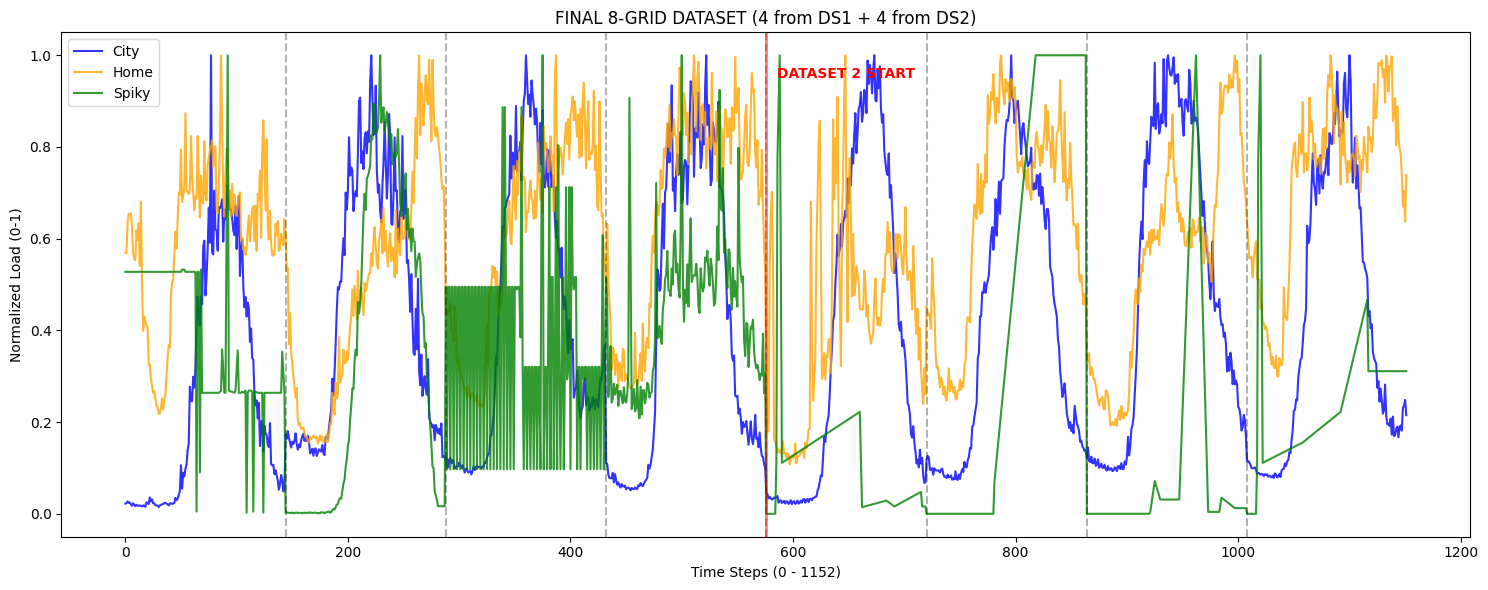

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# ==========================================
# 1. CONFIGURATION
# ==========================================
FILES = {
    'DS1': "/kaggle/input/milan-internet/milan_optimized_data1.csv",
    'DS2': "/kaggle/input/milan-internet/milan_optimized_data2.csv"
}
CHUNK_SIZE = 5_000_000
TIME_SLOTS = np.arange(0, 24*60, 10) # 144 slots

print("🚀 STARTING '4+4' DATASET GENERATION (8 Grids per Pod)")

# ==========================================
# PHASE 1: THE TWO ELECTIONS
# ==========================================
def run_election(dataset_name, filepath):
    print(f"\n🗳️  Running Election for {dataset_name}...")
    
    # Store scores: { 'grid_id': {'day': X, 'night': Y, 'max': Z, 'total': W} }
    scores = {}
    
    try:
        chunk_iterator = pd.read_csv(filepath, chunksize=CHUNK_SIZE)
    except:
        chunk_iterator = pd.read_csv(filepath, header=None, names=['square_id', 'time_interval', 'country_code', 'internet'], chunksize=CHUNK_SIZE)

    for i, chunk in enumerate(chunk_iterator):
        # Clean
        chunk = chunk[chunk['square_id'] != 'GridID']
        chunk['square_id'] = chunk['square_id'].astype(str)
        chunk['internet'] = pd.to_numeric(chunk['internet'])
        chunk['time_interval'] = pd.to_numeric(chunk['time_interval'])
        
        # Add Hour
        chunk['hour'] = pd.to_datetime(chunk['time_interval'], unit='ms').dt.hour
        
        # Aggregate by Grid
        grouped = chunk.groupby('square_id')
        
        for gid, group in grouped:
            day_vol = group[group['hour'].between(9, 16)]['internet'].sum()
            night_vol = group[group['hour'].between(19, 23)]['internet'].sum()
            total_vol = group['internet'].sum()
            max_vol = group['internet'].max()
            
            if gid not in scores:
                scores[gid] = {'day': 0, 'night': 0, 'max': 0, 'total': 0}
            
            scores[gid]['day'] += day_vol
            scores[gid]['night'] += night_vol
            scores[gid]['total'] += total_vol
            if max_vol > scores[gid]['max']:
                scores[gid]['max'] = max_vol
                
        print(f"   Processed Chunk {i+1}...", end='\r')

    # Convert to DataFrame
    df_scores = pd.DataFrame.from_dict(scores, orient='index')
    
    # --- SELECT TOP 4 ---
    # 1. City: Highest Day Traffic
    city_winners = df_scores.nlargest(4, 'day').index.tolist()
    
    # 2. Home: Highest Night Traffic (excluding City winners)
    candidates_home = df_scores[~df_scores.index.isin(city_winners)]
    home_winners = candidates_home.nlargest(4, 'night').index.tolist()
    
    # 3. Spiky: Highest Spike Ratio (Max / Total)
    # Exclude City & Home winners
    candidates_spiky = df_scores[~df_scores.index.isin(city_winners + home_winners)].copy()
    candidates_spiky['ratio'] = candidates_spiky['max'] / (candidates_spiky['total'] + 1)
    spiky_winners = candidates_spiky.nlargest(4, 'ratio').index.tolist()
    
    print(f"\n   ✅ {dataset_name} Results:")
    print(f"      City:  {city_winners}")
    print(f"      Home:  {home_winners}")
    print(f"      Spiky: {spiky_winners}")
    
    return {
        'City': city_winners,
        'Home': home_winners,
        'Spiky': spiky_winners
    }

# RUN THE ELECTIONS
winners_ds1 = run_election('DS1', FILES['DS1'])
winners_ds2 = run_election('DS2', FILES['DS2'])

# COMBINE (4 from DS1 + 4 from DS2)
FINAL_TARGETS = {
    'City': winners_ds1['City'] + winners_ds2['City'],
    'Home': winners_ds1['Home'] + winners_ds2['Home'],
    'Spiky': winners_ds1['Spiky'] + winners_ds2['Spiky']
}

print("\n🏆 FINAL CHAMPIONS (8 per Pod):")
print(f"   City: {len(FINAL_TARGETS['City'])} grids")
print(f"   Home: {len(FINAL_TARGETS['Home'])} grids")
print(f"   Spiky: {len(FINAL_TARGETS['Spiky'])} grids")


# ==========================================
# PHASE 2: EXTRACTION & NORMALIZATION
# ==========================================
print("\n🔍 PHASE 2: Extracting Profiles...")

# We need to scan both files again to get the actual data for these IDs
# Helper to extract data
def extract_data(dataset_name, filepath, target_list):
    extracted = {gid: [] for gid in target_list} # Store best profile per grid
    
    # Temp buffer
    buffer = {gid: {} for gid in target_list}
    
    chunk_iterator = pd.read_csv(filepath, chunksize=CHUNK_SIZE)
    
    for i, chunk in enumerate(chunk_iterator):
        chunk = chunk[chunk['square_id'] != 'GridID']
        chunk['square_id'] = chunk['square_id'].astype(str)
        
        # Filter
        chunk = chunk[chunk['square_id'].isin(target_list)]
        if chunk.empty: continue
            
        chunk['internet'] = pd.to_numeric(chunk['internet'])
        chunk['time_interval'] = pd.to_numeric(chunk['time_interval'])
        chunk['datetime'] = pd.to_datetime(chunk['time_interval'], unit='ms')
        chunk['date'] = chunk['datetime'].dt.date.astype(str)
        
        for (gid, date_str), group in chunk.groupby(['square_id', 'date']):
            if date_str not in buffer[gid]: buffer[gid][date_str] = []
            buffer[gid][date_str].append(group)
            
    # Process buffer to find Best Day for each grid
    for gid in target_list:
        best_day_vol = -1
        best_profile = np.zeros(144)
        
        if not buffer[gid]: continue
            
        for date_str, fragments in buffer[gid].items():
            full_day = pd.concat(fragments)
            agg = full_day.groupby('time_interval')['internet'].sum().reset_index()
            
            # Reindex
            agg['minute'] = pd.to_datetime(agg['time_interval'], unit='ms').dt.hour * 60 + \
                            pd.to_datetime(agg['time_interval'], unit='ms').dt.minute
            agg = agg.sort_values('minute').set_index('minute')
            reindexed = agg.reindex(TIME_SLOTS)
            clean_profile = reindexed['internet'].interpolate(method='linear').fillna(0)
            
            # Check if this is the best day (highest volume)
            if clean_profile.sum() > best_day_vol:
                best_day_vol = clean_profile.sum()
                
                # NORMALIZE (0-1)
                peak = clean_profile.max()
                if peak > 0:
                    best_profile = clean_profile.values / peak
                else:
                    best_profile = clean_profile.values
                    
        extracted[gid] = best_profile
        
    return extracted

# Extract from DS1 (Only looking for DS1 winners)
data_ds1 = extract_data('DS1', FILES['DS1'], winners_ds1['City'] + winners_ds1['Home'] + winners_ds1['Spiky'])

# Extract from DS2 (Only looking for DS2 winners)
data_ds2 = extract_data('DS2', FILES['DS2'], winners_ds2['City'] + winners_ds2['Home'] + winners_ds2['Spiky'])


# ==========================================
# PHASE 3: STITCHING (8 GRIDS)
# ==========================================
print("\n🔗 STITCHING 8-GRID SEQUENCES...")

final_sequences = {}

for zone in ['City', 'Home', 'Spiky']:
    full_seq = []
    
    # 1. Add DS1 Winners (4 Grids)
    for gid in winners_ds1[zone]:
        full_seq.extend(data_ds1.get(gid, np.zeros(144)))
        
    # 2. Add DS2 Winners (4 Grids)
    for gid in winners_ds2[zone]:
        full_seq.extend(data_ds2.get(gid, np.zeros(144)))
        
    final_sequences[zone] = full_seq

# ==========================================
# PHASE 4: SAVE & PLOT
# ==========================================
# Save
df_final = pd.DataFrame({
    'Time_Step': range(len(final_sequences['City'])),
    'City_Seq': final_sequences['City'],
    'Home_Seq': final_sequences['Home'],
    'Spiky_Seq': final_sequences['Spiky']
})

OUTPUT_PATH = "/kaggle/working/final_8_grid_gan_dataset.csv"
df_final.to_csv(OUTPUT_PATH, index=False)
print(f"\n💾 DATASET SAVED: {OUTPUT_PATH}")

# Plot
plt.figure(figsize=(15, 6))
plt.plot(df_final['City_Seq'], label='City', color='blue', alpha=0.8)
plt.plot(df_final['Home_Seq'], label='Home', color='orange', alpha=0.8)
plt.plot(df_final['Spiky_Seq'], label='Spiky', color='green', alpha=0.8)

# Add Separators for 8 Grids
for i in range(1, 8):
    plt.axvline(x=144*i, color='black', linestyle='--', alpha=0.3)
    if i == 4: # Mark the switch from DS1 to DS2
        plt.axvline(x=144*i, color='red', linestyle='-', alpha=0.5, linewidth=2)
        plt.text(144*i + 10, 0.95, "DATASET 2 START", color='red', fontweight='bold')

plt.title("FINAL 8-GRID DATASET (4 from DS1 + 4 from DS2)")
plt.xlabel("Time Steps (0 - 1152)")
plt.ylabel("Normalized Load (0-1)")
plt.legend()
plt.tight_layout()
plt.show()

🚀 FORMATTING FINAL DATASET (12 RUs Parallel)...

🏙️  Processing Commercial Zone (City)...
🏠 Processing Residential Zone (Home)...
⚡ Processing Event Zone (Spiky)...

💾 FINAL SAVED: /kaggle/working/final_simulation_matrix_12_ru.csv
   Structure: Time_Minute | RU_1 ... RU_12
   Rows: 144 (Every 10 mins for 24 hours)


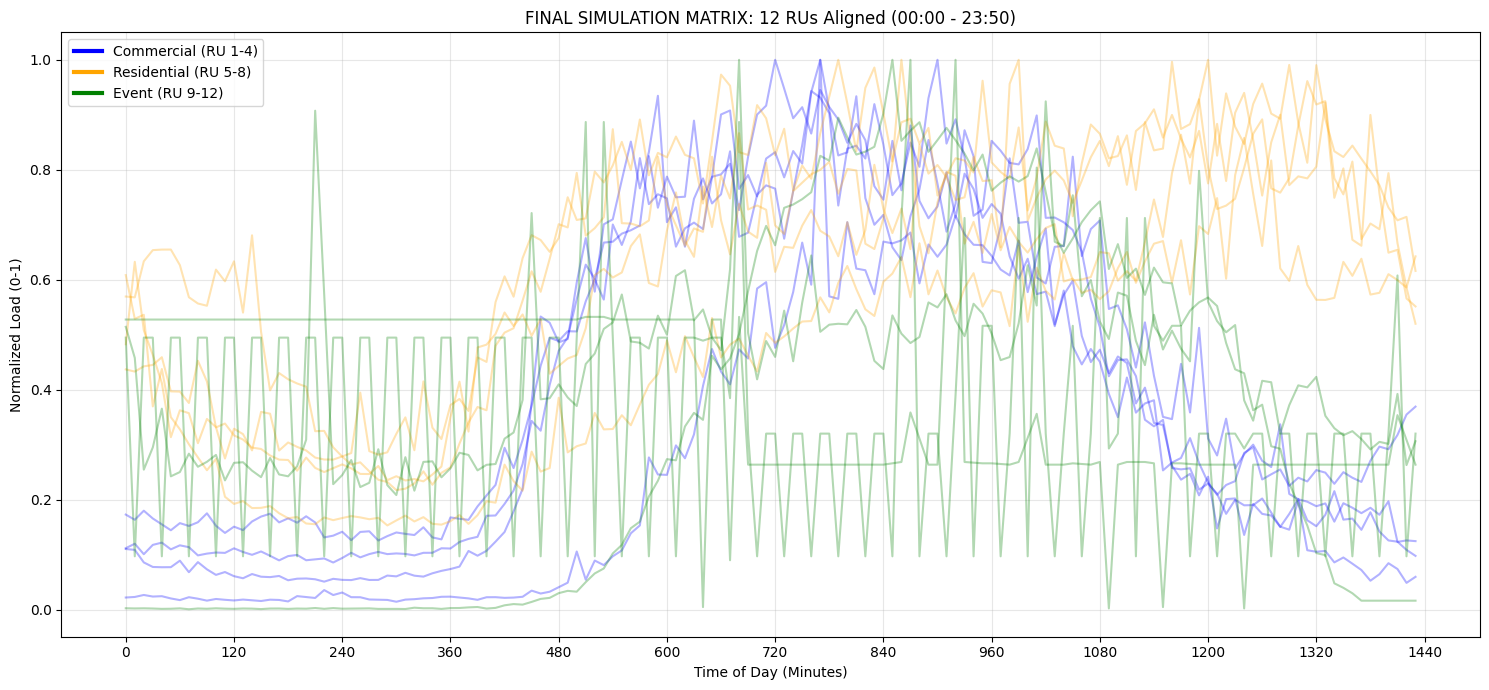

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/final_8_grid_gan_dataset.csv"
OUTPUT_FILE = "/kaggle/working/final_simulation_matrix_12_ru.csv"

print("🚀 FORMATTING FINAL DATASET (12 RUs Parallel)...")

# ==========================================
# 2. LOAD DATA
# ==========================================
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ Input file not found. Please run the previous extraction script first.")
    exit()

# The file contains long sequences (8 days = 1152 rows).
# We need to slice them into 24-hour chunks (144 rows).

# ==========================================
# 3. SLICE & ASSIGN
# ==========================================
final_matrix = pd.DataFrame()

# Standard Time Axis (0 to 1430 minutes)
final_matrix['Time_Minute'] = np.arange(0, 24*60, 10)

# --- CITY (RU 1 - RU 4) ---
print("\n🏙️  Processing Commercial Zone (City)...")
city_seq = df['City_Seq'].values
final_matrix['RU_1'] = city_seq[0:144]     # Grid 1
final_matrix['RU_2'] = city_seq[144:288]   # Grid 2
final_matrix['RU_3'] = city_seq[288:432]   # Grid 3
final_matrix['RU_4'] = city_seq[432:576]   # Grid 4

# --- HOME (RU 5 - RU 8) ---
print("🏠 Processing Residential Zone (Home)...")
home_seq = df['Home_Seq'].values
final_matrix['RU_5'] = home_seq[0:144]     # Grid 1
final_matrix['RU_6'] = home_seq[144:288]   # Grid 2
final_matrix['RU_7'] = home_seq[288:432]   # Grid 3
final_matrix['RU_8'] = home_seq[432:576]   # Grid 4

# --- SPIKY (RU 9 - RU 12) ---
print("⚡ Processing Event Zone (Spiky)...")
spiky_seq = df['Spiky_Seq'].values
final_matrix['RU_9'] = spiky_seq[0:144]    # Grid 1
final_matrix['RU_10'] = spiky_seq[144:288] # Grid 2
final_matrix['RU_11'] = spiky_seq[288:432] # Grid 3
final_matrix['RU_12'] = spiky_seq[432:576] # Grid 4

# ==========================================
# 4. SAVE & VERIFY
# ==========================================
final_matrix.to_csv(OUTPUT_FILE, index=False)
print(f"\n💾 FINAL SAVED: {OUTPUT_FILE}")
print("   Structure: Time_Minute | RU_1 ... RU_12")
print("   Rows: 144 (Every 10 mins for 24 hours)")

# --- PLOT TO CONFIRM ALIGNMENT ---
plt.figure(figsize=(15, 7))

# Plot City RUs (Blue)
for col in ['RU_1', 'RU_2', 'RU_3', 'RU_4']:
    plt.plot(final_matrix['Time_Minute'], final_matrix[col], color='blue', alpha=0.3)

# Plot Home RUs (Orange)
for col in ['RU_5', 'RU_6', 'RU_7', 'RU_8']:
    plt.plot(final_matrix['Time_Minute'], final_matrix[col], color='orange', alpha=0.3)

# Plot Spiky RUs (Green)
for col in ['RU_9', 'RU_10', 'RU_11', 'RU_12']:
    plt.plot(final_matrix['Time_Minute'], final_matrix[col], color='green', alpha=0.3)

# Add Legend based on Average Lines
plt.plot([], [], color='blue', linewidth=3, label='Commercial (RU 1-4)')
plt.plot([], [], color='orange', linewidth=3, label='Residential (RU 5-8)')
plt.plot([], [], color='green', linewidth=3, label='Event (RU 9-12)')

plt.title("FINAL SIMULATION MATRIX: 12 RUs Aligned (00:00 - 23:50)")
plt.xlabel("Time of Day (Minutes)")
plt.ylabel("Normalized Load (0-1)")
plt.xticks(np.arange(0, 1441, 120)) # Show every 2 hours
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🚀 CREATING 4-DAY SIMULATION DATASET (12 RUs x 96 Hours)...

🏙️  Processing Commercial Zone (City)...
🏠 Processing Residential Zone (Home)...
⚡ Processing Event Zone (Spiky)...

💾 FINAL SAVED: /kaggle/working/final_simulation_matrix_4days.csv
   Rows: 576 (Should be 576)
   Columns: Time_Minute | RU_1 ... RU_12


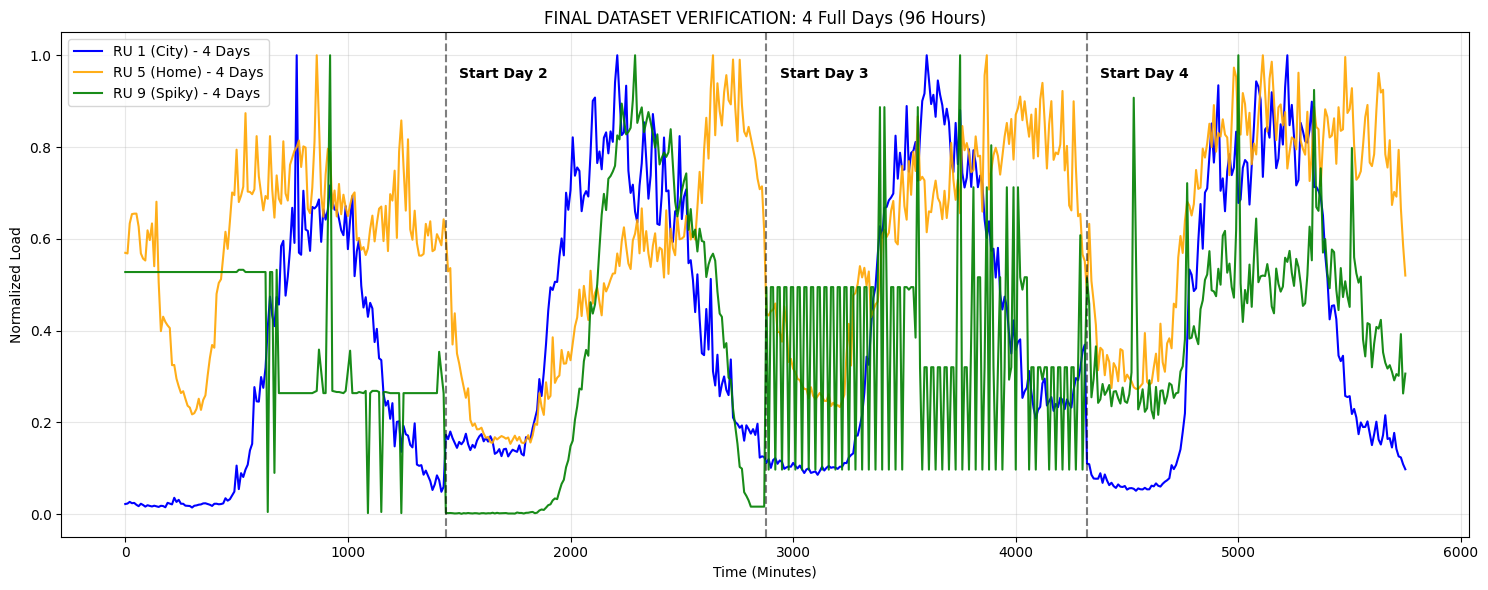

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/final_8_grid_gan_dataset.csv"
OUTPUT_FILE = "/kaggle/working/final_simulation_matrix_4days.csv"

print("🚀 CREATING 4-DAY SIMULATION DATASET (12 RUs x 96 Hours)...")

# ==========================================
# 2. LOAD DATA
# ==========================================
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ Input file not found. Please run the '4+4' generation script first.")
    exit()

# The file contains 1152 rows (8 Days of stitched data)
city_source = df['City_Seq'].values
home_source = df['Home_Seq'].values
spiky_source = df['Spiky_Seq'].values

# We need 4 Days = 4 * 24 hours * 6 slots/hr = 576 time steps
REQUIRED_ROWS = 576

# ==========================================
# 3. BUILD THE MATRIX (Sliding Window)
# ==========================================
final_matrix = pd.DataFrame()

# Time Axis: 0 to 5750 minutes (4 Days)
final_matrix['Time_Minute'] = np.arange(0, 4 * 24 * 60, 10)

# Helper to slice 4 days of data starting from a specific day offset
def get_4_day_slice(source_array, start_day_offset):
    start_idx = start_day_offset * 144
    end_idx = start_idx + 576
    return source_array[start_idx:end_idx]

# --- CITY (RU 1 - RU 4) ---
print("\n🏙️  Processing Commercial Zone (City)...")
# RU 1 gets Grids 1-4, RU 2 gets Grids 2-5, etc.
final_matrix['RU_1'] = get_4_day_slice(city_source, 0)
final_matrix['RU_2'] = get_4_day_slice(city_source, 1)
final_matrix['RU_3'] = get_4_day_slice(city_source, 2)
final_matrix['RU_4'] = get_4_day_slice(city_source, 3)

# --- HOME (RU 5 - RU 8) ---
print("🏠 Processing Residential Zone (Home)...")
final_matrix['RU_5'] = get_4_day_slice(home_source, 0)
final_matrix['RU_6'] = get_4_day_slice(home_source, 1)
final_matrix['RU_7'] = get_4_day_slice(home_source, 2)
final_matrix['RU_8'] = get_4_day_slice(home_source, 3)

# --- SPIKY (RU 9 - RU 12) ---
print("⚡ Processing Event Zone (Spiky)...")
final_matrix['RU_9'] = get_4_day_slice(spiky_source, 0)
final_matrix['RU_10'] = get_4_day_slice(spiky_source, 1)
final_matrix['RU_11'] = get_4_day_slice(spiky_source, 2)
final_matrix['RU_12'] = get_4_day_slice(spiky_source, 3)

# ==========================================
# 4. SAVE & VERIFY
# ==========================================
final_matrix.to_csv(OUTPUT_FILE, index=False)
print(f"\n💾 FINAL SAVED: {OUTPUT_FILE}")
print(f"   Rows: {len(final_matrix)} (Should be 576)")
print("   Columns: Time_Minute | RU_1 ... RU_12")

# --- PLOT TO CONFIRM 4-DAY DURATION ---
plt.figure(figsize=(15, 6))

# Plot one RU from each category to show the full 4-day pattern
plt.plot(final_matrix['Time_Minute'], final_matrix['RU_1'], color='blue', label='RU 1 (City) - 4 Days', linewidth=1.5)
plt.plot(final_matrix['Time_Minute'], final_matrix['RU_5'], color='orange', label='RU 5 (Home) - 4 Days', linewidth=1.5, alpha=0.9)
plt.plot(final_matrix['Time_Minute'], final_matrix['RU_9'], color='green', label='RU 9 (Spiky) - 4 Days', linewidth=1.5, alpha=0.9)

# Add Day Separators
for i in range(1, 4):
    plt.axvline(x=i * 24 * 60, color='black', linestyle='--', alpha=0.5)
    plt.text(i * 24 * 60 + 60, 0.95, f"Start Day {i+1}", fontsize=10, fontweight='bold')

plt.title("FINAL DATASET VERIFICATION: 4 Full Days (96 Hours)")
plt.xlabel("Time (Minutes)")
plt.ylabel("Normalized Load")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📊 GENERATING 4-DAY AVERAGE POD PLOT...


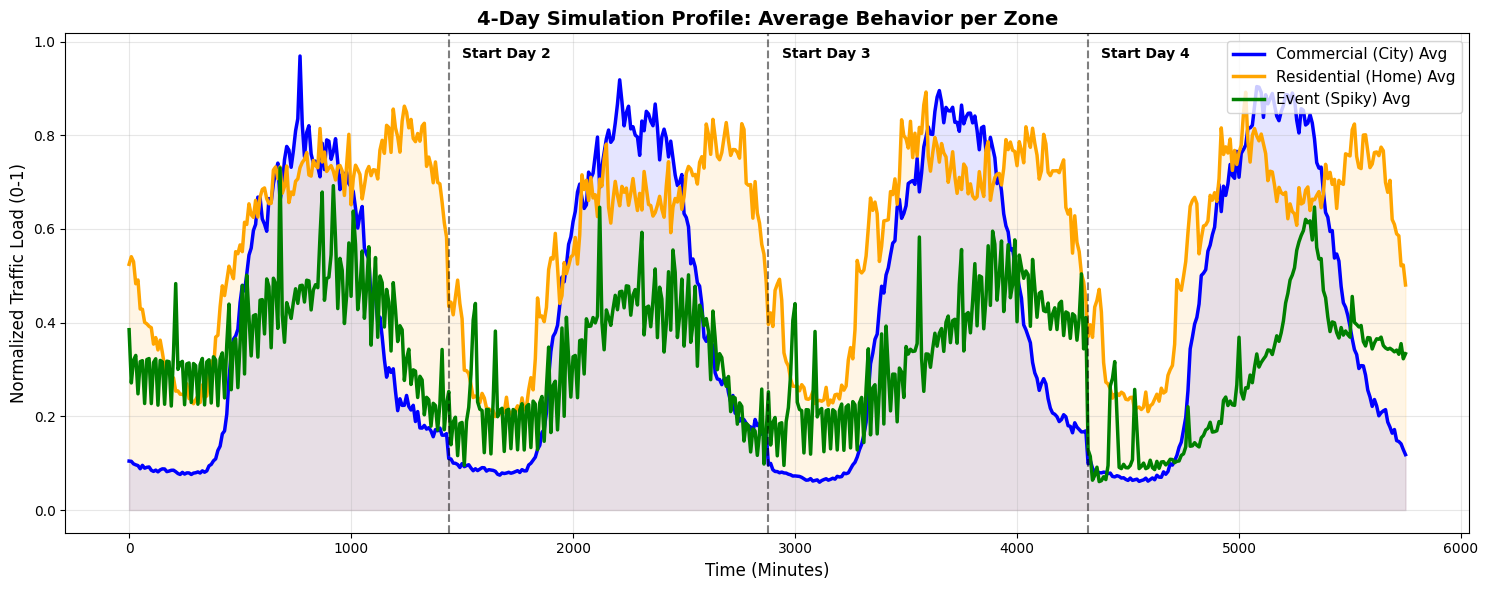

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION
# ==========================================
INPUT_FILE = "/kaggle/working/final_simulation_matrix_4days.csv"

print("📊 GENERATING 4-DAY AVERAGE POD PLOT...")

# ==========================================
# 2. LOAD DATA
# ==========================================
try:
    df = pd.read_csv(INPUT_FILE)
except FileNotFoundError:
    print("❌ Input file not found. Run the previous script first.")
    exit()

# ==========================================
# 3. CALCULATE AVERAGES
# ==========================================
# City Average (RU 1-4)
df['City_Avg'] = df[['RU_1', 'RU_2', 'RU_3', 'RU_4']].mean(axis=1)

# Home Average (RU 5-8)
df['Home_Avg'] = df[['RU_5', 'RU_6', 'RU_7', 'RU_8']].mean(axis=1)

# Spiky Average (RU 9-12)
df['Spiky_Avg'] = df[['RU_9', 'RU_10', 'RU_11', 'RU_12']].mean(axis=1)

# ==========================================
# 4. PLOT
# ==========================================
plt.figure(figsize=(15, 6))

# Plot Lines
plt.plot(df['Time_Minute'], df['City_Avg'], label='Commercial (City) Avg', color='blue', linewidth=2.5)
plt.plot(df['Time_Minute'], df['Home_Avg'], label='Residential (Home) Avg', color='orange', linewidth=2.5)
plt.plot(df['Time_Minute'], df['Spiky_Avg'], label='Event (Spiky) Avg', color='green', linewidth=2.5)

# Add Day Separators (Every 24 hours = 1440 minutes)
days = [1, 2, 3]
for day in days:
    x_val = day * 24 * 60
    plt.axvline(x=x_val, color='black', linestyle='--', alpha=0.5)
    plt.text(x_val + 60, 0.95, f"Start Day {day+1}", fontsize=10, fontweight='bold', transform=plt.gca().get_xaxis_transform())

# Fill areas to make it look professional
plt.fill_between(df['Time_Minute'], df['City_Avg'], alpha=0.1, color='blue')
plt.fill_between(df['Time_Minute'], df['Home_Avg'], alpha=0.1, color='orange')

# Styling
plt.title("4-Day Simulation Profile: Average Behavior per Zone", fontsize=14, fontweight='bold')
plt.xlabel("Time (Minutes)", fontsize=12)
plt.ylabel("Normalized Traffic Load (0-1)", fontsize=12)
plt.legend(loc='upper right', frameon=True, fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show
plt.show()